In [22]:
import numpy as np
import imageio
import cv2 
import glob
import matplotlib.pyplot as plt

## Import Images


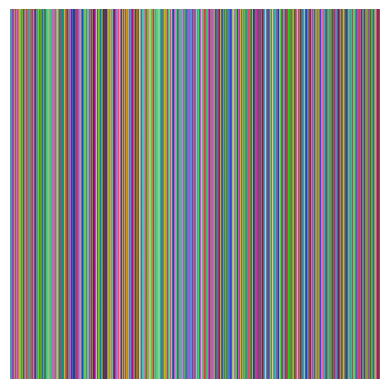

In [23]:
images = glob.glob("Images/*.png")
image_size = [1000,1000]
image_list = []
for image in images:
    temp = cv2.imread(image,1)
    resized = cv2.resize(temp,image_size)
    image_list.append(resized.astype(float))
temp = image_list[0].astype(np.uint8)
plt.imshow(temp)
plt.axis('off')
plt.imsave("Renders/image.png",temp.astype(np.uint8))

## Feedback

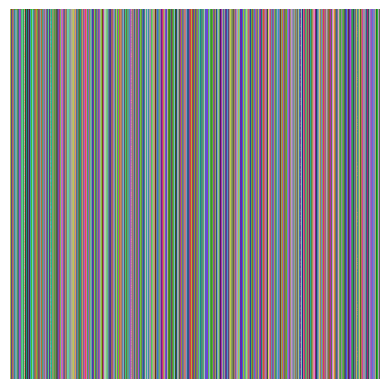

In [24]:
feedback = -0.99
current_image = image_list[0].copy()
previous_image = np.zeros_like(current_image)
next_image = image_list[1].copy()
for i in range(2):
    current_image += previous_image * feedback
    previous_image = next_image
plt.imshow(current_image.astype(np.uint8))
plt.axis('off')
plt.imsave("Renders/feedback.png",current_image.astype(np.uint8))

## Rolling

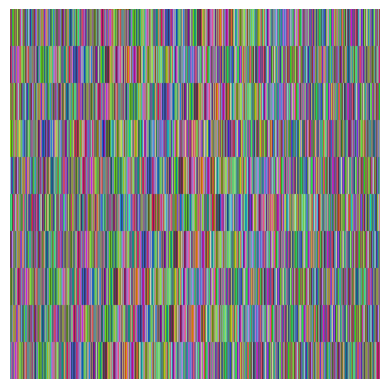

In [25]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
image = image_list[0].copy()

previous_offset  = 0 
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
for i in sections:
        temp_section[0:section_offset,0:section_width,:] = image[previous_offset:i,0:section_width,:]
        rand = int(np.random.uniform(0,999))
        temp2 = np.roll(temp_section,rand)
        image[previous_offset:i,0:section_width,:] = temp2
        previous_offset += section_offset
plt.imshow(image.astype(np.uint8))
plt.axis('off')
plt.imsave("Renders/rolling.png",image.astype(np.uint8))

## Rolling Feedback

In [ ]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
previous_image = np.zeros_like(image_list[0])
render_list = []
previous_offset = 0
num_iters  = 4
feedback = -0.99
images_copy = image_list.copy()
current_image = np.zeros_like(image_list[0])
for iters in range(num_iters):
        for current_image in images_copy:
                for i in sections:
                        temp_section[0:section_offset,0:section_width,:] = current_image[previous_offset:i,0:section_width,:]
                        rand = int(np.random.uniform(0,999))
                        temp2 = np.roll(temp_section,rand)
                        current_image[previous_offset:i,0:section_width,:] = temp2
                        previous_offset += section_offset
                current_image += previous_image
                previous_image = current_image * feedback
                render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))
                previous_offset = 0
        print(iters)


0
1
2
3


## Render Rolling Feedback


In [27]:
#takes a while
imageio.mimsave('Renders/rolling_feedback.gif', render_list)

## Rolling Feedback v2

In [28]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
previous_image = np.zeros_like(image_list[0])
render_list = []
previous_offset = 0
num_iters  = 4
images_copy = image_list.copy()
feedback = 0.99
current_image = np.zeros_like(image_list[0])
for iters in range(num_iters):
        for current_image in images_copy:
                for i in sections:
                        temp_section[0:section_offset,0:section_width,:] = current_image[previous_offset:i,0:section_width,:]
                        rand = int(np.random.uniform(0,999))
                        temp2 = np.roll(temp_section,rand)
                        current_image[previous_offset:i,0:section_width,:] = temp2
                        previous_offset += section_offset
                current_image += previous_image
                previous_image = current_image * feedback
                render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))
                previous_offset = 0
        print(iters)


0
1
2
3


## Render Rolling Feedback v2 

In [29]:
imageio.mimsave('Renders/rolling_feedback_v2.gif', render_list)
